<a href="https://colab.research.google.com/github/sarah-alhajri/Fashion-MNIST-Image-Classification-with-CNN/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Sarah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

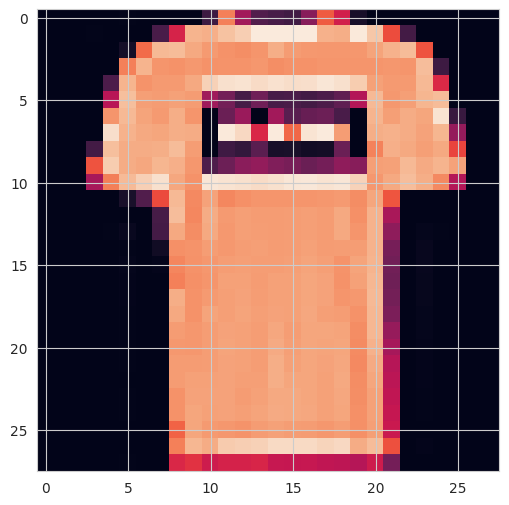

In [7]:
plt.imshow(x_train[1],)

In [8]:
classes[y_train[1]]

'T-shirt/top'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
x_train[0].max()

255

In [10]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [11]:
x_train[0].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
y_train.shape

(60000, 10)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, stratify = y_train)

In [18]:
x_val.shape

(6000, 28, 28, 1)

In [19]:
y_val.shape

(6000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [20]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=x_train[0].shape, activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [22]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True)

In [23]:
model.fit(x_train, y_train, batch_size=50, epochs=25,
           callbacks=[early_stop],
          validation_data = (x_val, y_val))

Epoch 1/25
1080/1080 [==============================] - 14s 5ms/step - loss: 0.4144 - accuracy: 0.8544 - val_loss: 0.3263 - val_accuracy: 0.8823
Epoch 2/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2700 - accuracy: 0.9043 - val_loss: 0.2827 - val_accuracy: 0.8998
Epoch 3/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.2257 - accuracy: 0.9171 - val_loss: 0.2629 - val_accuracy: 0.9080
Epoch 4/25
1080/1080 [==============================] - 5s 4ms/step - loss: 0.1940 - accuracy: 0.9286 - val_loss: 0.2794 - val_accuracy: 0.9018
Epoch 5/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1711 - accuracy: 0.9374 - val_loss: 0.2572 - val_accuracy: 0.9132
Epoch 6/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1508 - accuracy: 0.9440 - val_loss: 0.2687 - val_accuracy: 0.9117
Epoch 7/25
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1317 - accuracy: 0.9513 - val_loss: 0.2674 - val_accuracy

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.414,0.854,0.326,0.882
1,0.270,0.904,0.283,0.900
2,0.226,0.917,0.263,0.908
3,0.194,0.929,0.279,0.902
4,0.171,0.937,0.257,0.913


**TASK 7: Plot values of metrics you used in your model.**

<Axes: >

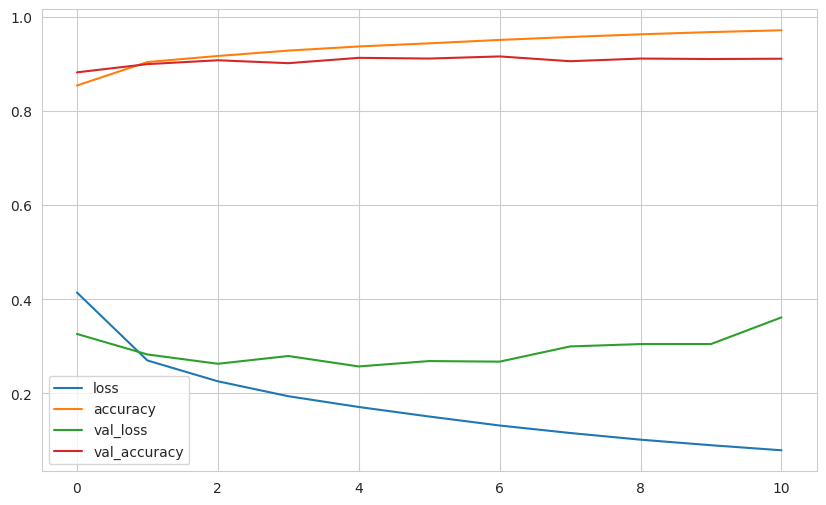

In [25]:
loss_df.plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [27]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.27232450246810913
accuracy:  0.9129999876022339


In [28]:
from sklearn.metrics import (classification_report, confusion_matrix, multilabel_confusion_matrix,)

In [32]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)
y_pred = to_categorical(y_pred)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.88      0.86      1000
           3       0.91      0.93      0.92      1000
           4       0.84      0.89      0.87      1000
           5       0.99      0.96      0.97      1000
           6       0.79      0.75      0.77      1000
           7       0.91      0.99      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.93      0.95      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000
 samples avg       0.91      0.91      0.91     10000



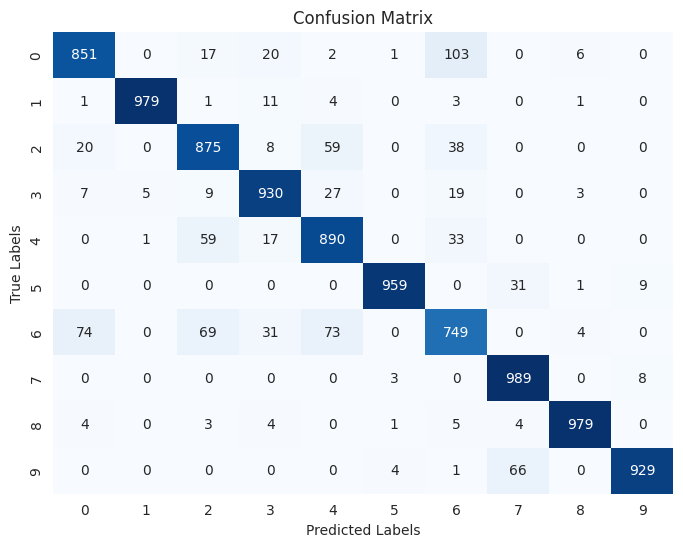

In [40]:
from sklearn.metrics import confusion_matrix

# Convert multilabel-indicator format to single-label format
y_test_single = np.argmax(y_test, axis=1)
y_pred_single = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_single, y_pred_single)
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

## Prediction

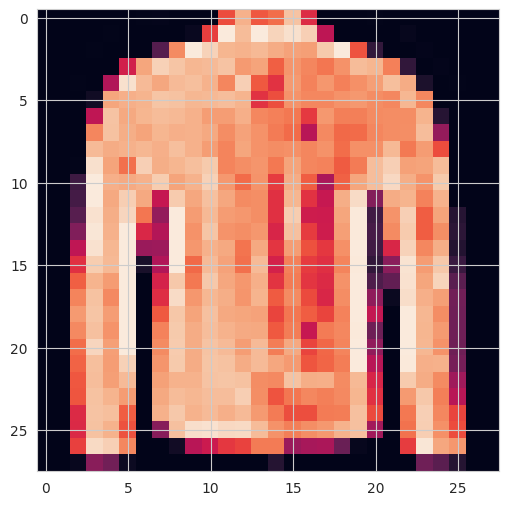

In [41]:
plt.imshow(x_test[50])
plt.show()

In [54]:
y_test = np.argmax(y_test, axis=1)

classes[y_test[50]]

'Coat'

In [55]:
predicted_value = model.predict(np.expand_dims(x_test[50], 0))
predicted_value

1/1 [==============================] - 0s 47ms/step


array([[1.8092494e-05, 4.6511180e-11, 3.6958136e-04, 9.1505926e-13,
        9.8516512e-01, 7.7678775e-12, 1.4447249e-02, 2.5592552e-15,
        1.1828970e-12, 2.9289283e-11]], dtype=float32)

In [57]:
classes[np.argmax(predicted_value)]

'Coat'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___